In [6]:
import os
from glob import glob

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
label_paths = glob('data/lab_classroom/*_seg.png')
label_paths

['data/lab_classroom\\ADE_train_00010761_seg.png',
 'data/lab_classroom\\ADE_train_00010762_seg.png',
 'data/lab_classroom\\ADE_train_00010763_seg.png',
 'data/lab_classroom\\ADE_train_00010764_seg.png',
 'data/lab_classroom\\ADE_train_00010765_seg.png',
 'data/lab_classroom\\ADE_train_00010766_seg.png',
 'data/lab_classroom\\ADE_train_00010767_seg.png',
 'data/lab_classroom\\ADE_train_00010768_seg.png']

In [8]:
lbl_path = label_paths[0]
lbl_path

'data/lab_classroom\\ADE_train_00010761_seg.png'

In [14]:
image = np.array(Image.open(lbl_path))

# Image들 사이즈들 확인

In [57]:
sizes = []
for path in label_paths:
    image = np.array(Image.open(path))
    size = image.shape[0] * image.shape[1]
    if size not in sizes:
        sizes.append(size)

In [59]:
sizes 

[186737, 421600, 307200, 73790, 1228800, 1628640, 3145728, 3150000]

## 이미지 모양들이 다른 것을 확인

In [60]:
heights = []
widths = []

for path in label_paths:
    image = np.array(Image.open(path))
    h, w, _ = image.shape
    heights.append(h)
    widths.append(w)

In [61]:
np.mean(heights), np.mean(widths)

(828.875, 1159.625)

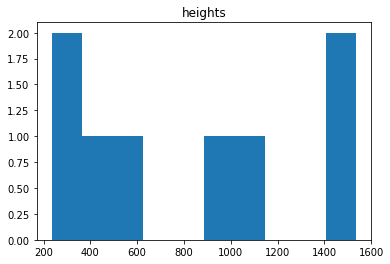

In [64]:
plt.title('heights')
plt.hist(heights)
plt.show()

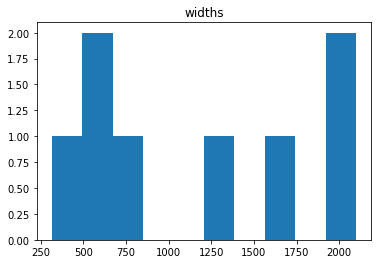

In [65]:
plt.title('widths')
plt.hist(widths)
plt.show()

# Label Pixel 확인

In [15]:
np.unique(image)

array([  0,   6,   9,  10,  17,  20,  26,  30,  34,  37,  43,  51,  60,
        68,  76,  77,  80,  85,  90,  94, 100, 102, 110, 111, 119, 120,
       124, 128, 136, 145, 153, 162, 170, 179, 187, 191, 196, 199, 202,
       204, 206, 208, 212, 213, 214, 221, 230, 238, 247, 255], dtype=uint8)

Image data/lab_classroom\ADE_train_00010761_seg.png


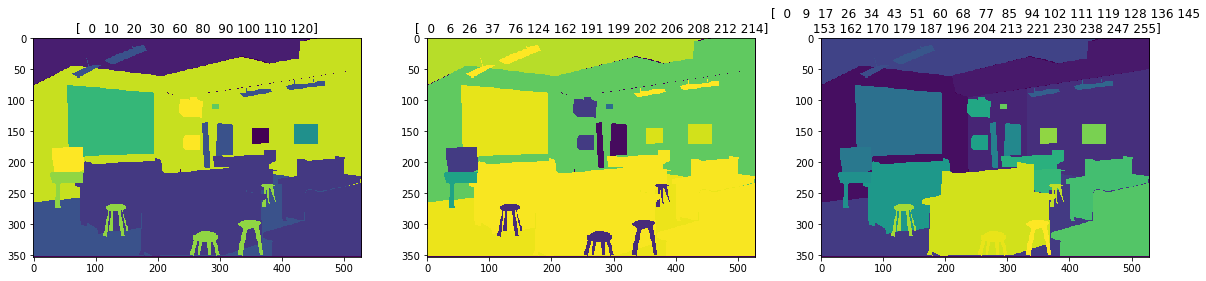

Image data/lab_classroom\ADE_train_00010762_seg.png


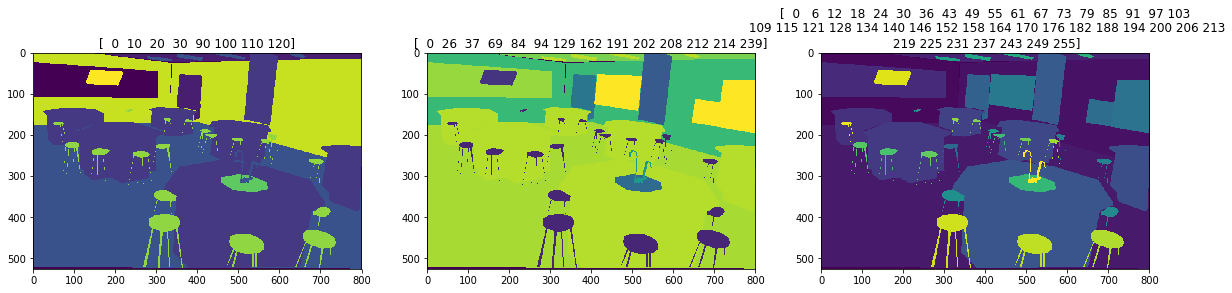

Image data/lab_classroom\ADE_train_00010763_seg.png


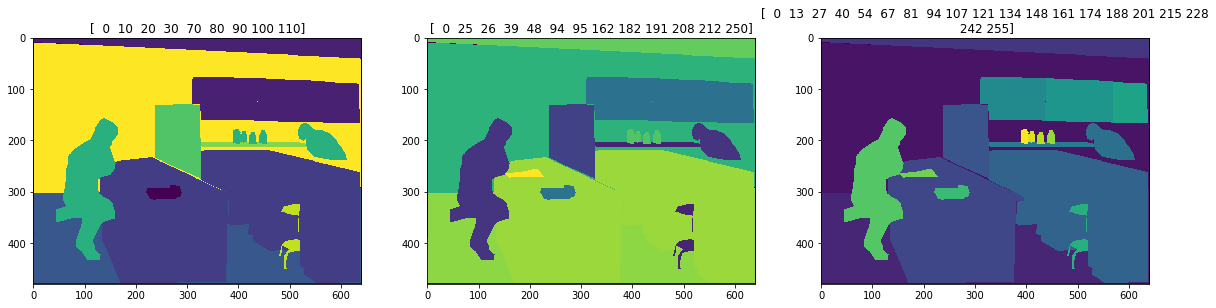

In [81]:
for n in range(3):
    lbl_path = label_paths[n]
    image = np.array(Image.open(lbl_path))
    print("Image", lbl_path)
    plt.figure(figsize=(20, 30))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(image[:,:,i])
        plt.title(np.unique(image[:,:,i]))
#         plt.colorbar()
    plt.show()

# Unique한 Image 찾기

In [35]:
labels = []

for path in label_paths:
    image = np.array(Image.open(path))[:,:,0]
    uniques = np.unique(image)
    for u in uniques:
        if u not in labels:
            labels.append(u)

In [37]:
labels.sort()  # Label 순서대로 정렬
labels

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

## 해당 Label 찾기

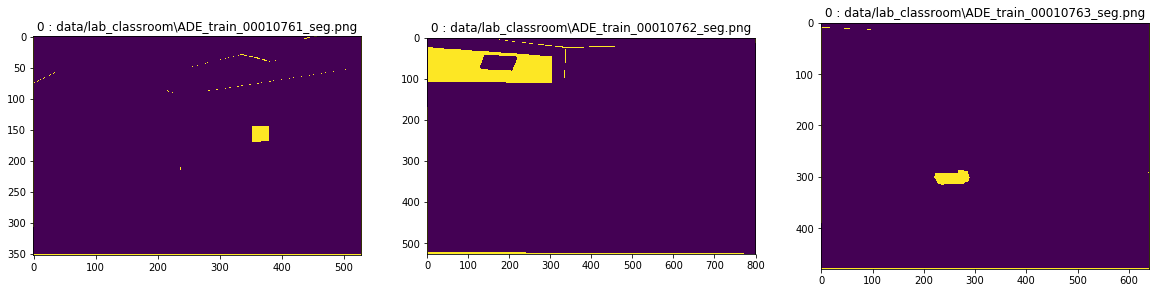

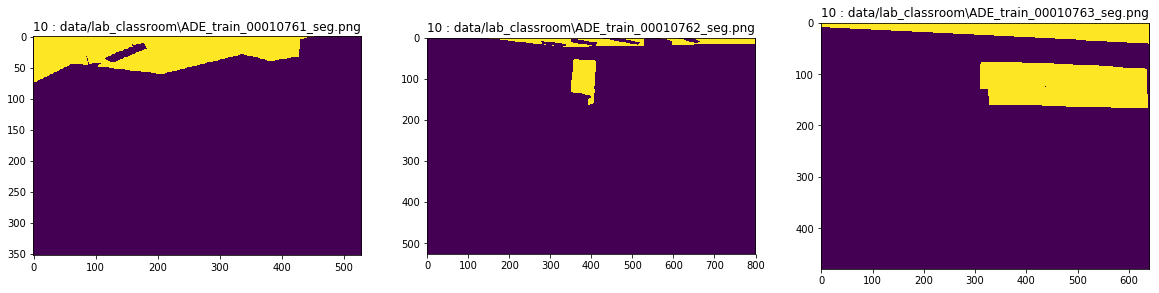

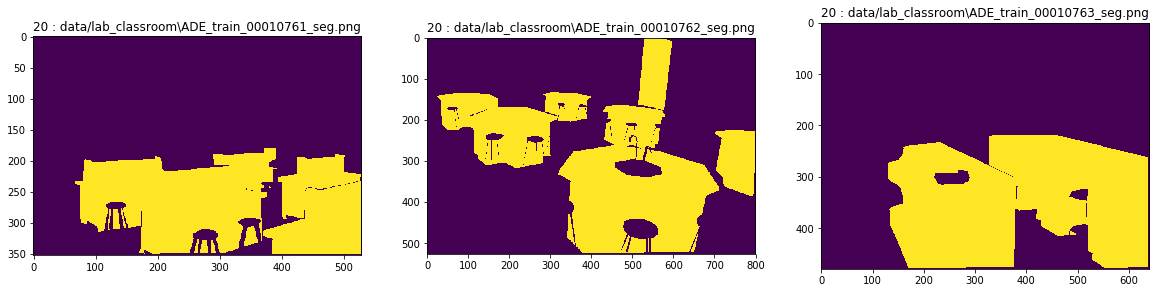

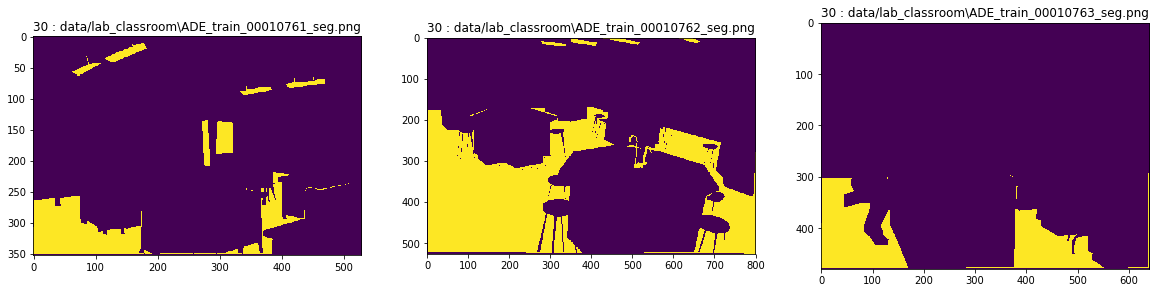

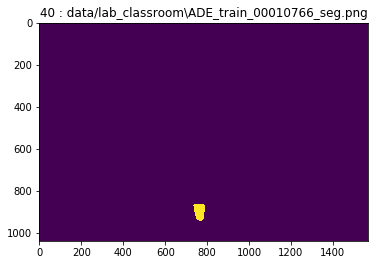

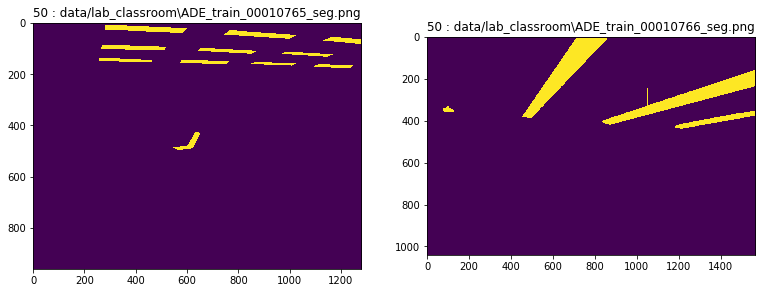

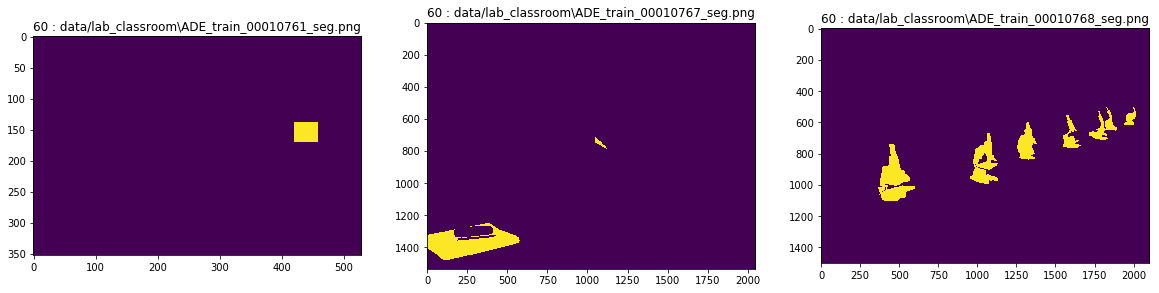

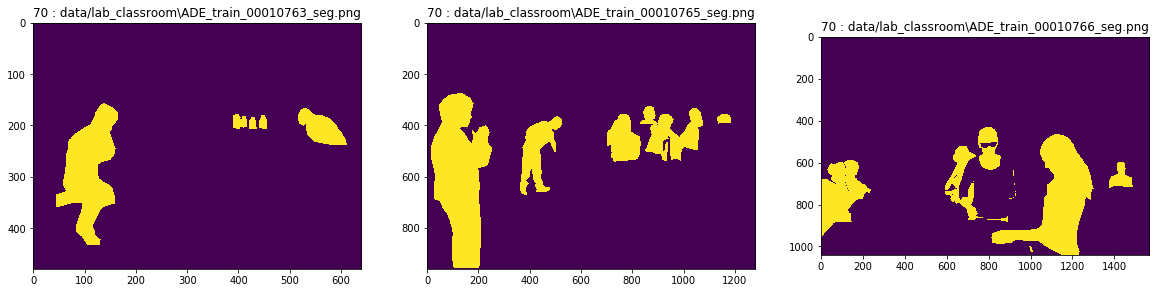

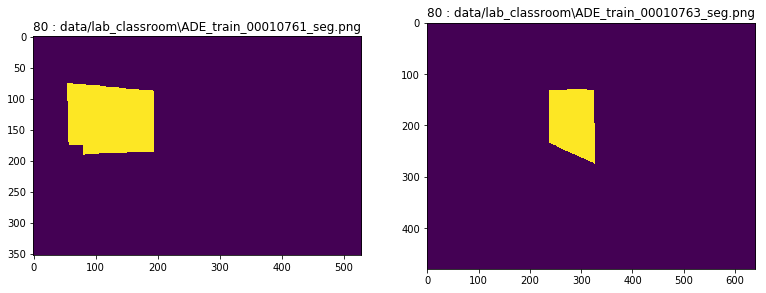

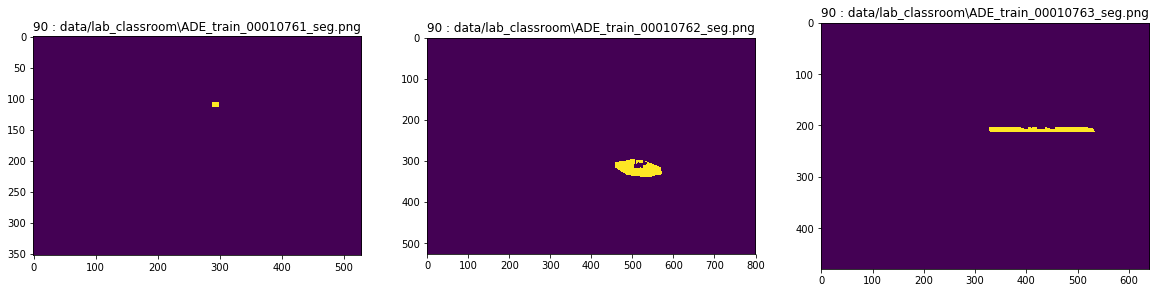

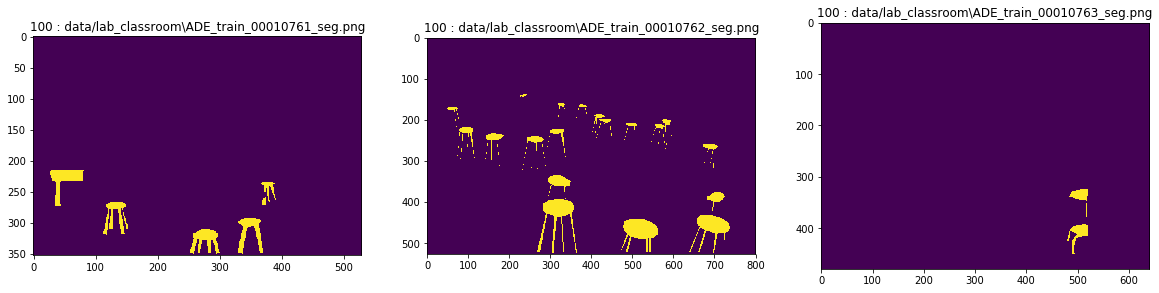

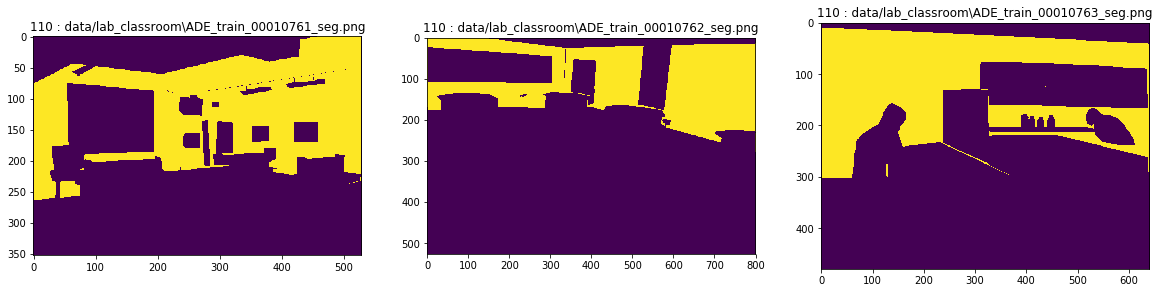

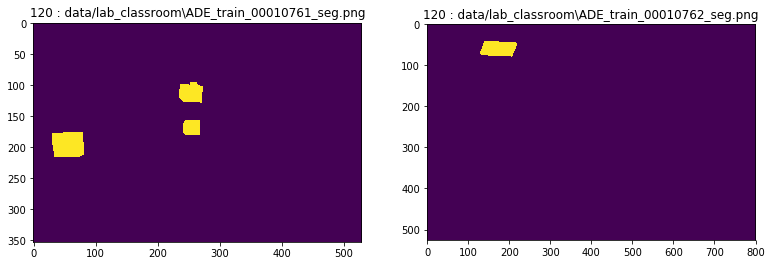

In [50]:
# 각 레이블별로 포함된 3개의 이미지를 열어봐서 레이블 확인 
for lbl_num in labels:
    num_img = 0
    
    plt.figure(figsize=(20, 30))
    for path in label_paths:
        image = np.array(Image.open(path))[:,:,0]
        
        if lbl_num in image:
            plt.subplot(1, 3, num_img + 1)
            plt.imshow(np.where(image == lbl_num, 1, 0))
            plt.title(str(lbl_num) + " : " + path)
            num_img += 1

        if num_img > 2:
            plt.show()
            break

# Note: 클래스 수는 0부터 12까지 총 13개!!

In [151]:
num_classes = 13

# Label 별 Pixel 빈도수 확인

In [94]:
label_sizes = np.zeros(num_classes)
label_sizes

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
path = label_paths[0]
image = np.array(Image.open(path))[:,:,0] // 10
lbls, counts = np.unique(image, return_counts=True)
print(lbls)
print(counts)

[ 0  1  2  5  6  7  8  9 10]
[22744 55389 18967  1288 14288    88  4576 65700  3697]


In [96]:
for i, n in enumerate(lbls):
    label_sizes[n] += counts[i]

In [97]:
label_sizes

array([22744., 55389., 18967.,     0.,     0.,  1288., 14288.,    88.,
        4576., 65700.,  3697.,     0.])

### 위의 함수 취합하기

In [142]:
label_sizes = np.zeros(num_classes)

In [143]:
np.unique(image)

array([ 0,  1,  2,  3,  6,  8,  9, 10, 11, 12], dtype=uint8)

In [144]:
for path in label_paths:
    image = np.array(Image.open(path))[:,:,0] // 10
    lbls, counts = np.unique(image, return_counts=True)
    for i, n in enumerate(lbls):
        label_sizes[n] += counts[i]

In [145]:
label_sizes

array([ 386223., 1376867.,  819375., 1125961.,    3557.,  119434.,
        182427., 1935530.,   25193.,   44259., 1244973., 2872157.,
          6539.])

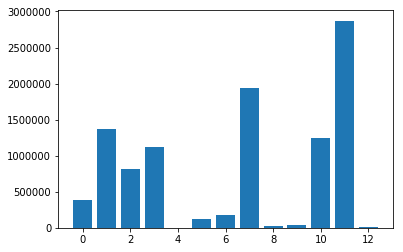

In [147]:
plt.bar(list(range(num_classes)), label_sizes)
plt.show()

# One Hot Labeling 해보기

In [148]:
import tensorflow as tf

In [152]:
label = tf.keras.utils.to_categorical(image//10, num_classes)

In [153]:
label.shape

(1500, 2100, 13)